# Tutorial 3 Homework Task
The aim of this exercise is to test your understanding of KMeans and Hierarichal Clustering algorithm.

<b>Fields	Descriptions of the given dataset "real_estate.csv"</b>

<b>CRIM</b>	Per capita crime rate by town

<b>INDUS</b>	proportion of non-retail business acres per town

<b>RM</b>	Average number of rooms per dwelling

<b>PTRATIO</b>	pupil-teacher ratio by town

<b>LSTAT</b>	% lower status of the population

### <span style="color:red">Tutorial Exercise</span>
As part of this task, you need to provide Python codes to achieve the following steps:

1. Acquire data from 'real_estate.csv' and view top rows of the data [Marks: 0.25]
2. Standarise/Normalise your data by using appropriate method [Marks: 0.25]
3. Using Elbow method find the most appropriate value of  K for KMean.[Marks: 0.5]
4. Use the K value as number of clusters obtained from step 3, compare KMean and Hierarichal clustering[Complete Linkage] on the data by plotting results in separate 3D graphs using any three features or attributes.[Marks: 0.5]


In [16]:
#Answer to 1

from pandas import DataFrame
import pandas as pd
#read data
df=pd.read_csv('real_estate.csv')
print(df.info())

#print top rows of the data
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   INDUS    506 non-null    float64
 2   RM       506 non-null    float64
 3   DIS      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
dtypes: float64(6)
memory usage: 23.8 KB
None
      CRIM  INDUS     RM     DIS  PTRATIO  LSTAT
0  0.00632   2.31  6.575  4.0900     15.3   4.98
1  0.02731   7.07  6.421  4.9671     17.8   9.14
2  0.02729   7.07  7.185  4.9671     17.8   4.03
3  0.03237   2.18  6.998  6.0622     18.7   2.94
4  0.06905   2.18  7.147  6.0622     18.7   5.33


In [17]:
#Answer to 2
from sklearn.preprocessing import StandardScaler

#Standardise/normalise data
df_normal = StandardScaler().fit_transform(df)
#check Standardised data
print(df_normal)

#Convert the standardised data back into dataframe
df2 = pd.DataFrame(df_normal)
print(df2)

[[-0.420303   -1.30024108  0.40877354  0.15031417 -1.45389248 -1.00982322]
 [-0.41785992 -0.60207324  0.18974535  0.56916257 -0.31747751 -0.47756756]
 [-0.41786225 -0.60207324  1.27635273  0.56916257 -0.31747751 -1.13137198]
 ...
 [-0.36932193  0.19436613 -0.23408841 -0.37641001  2.04626563  1.03987284]
 [-0.33052832  0.22370091 -0.09328458 -0.58843679  2.04626563  8.07690675]
 [-0.34488067  0.2383683   0.67189182 -0.37641001  2.04626563  4.11057855]]
            0         1         2         3         4         5
0   -0.420303 -1.300241  0.408774  0.150314 -1.453892 -1.009823
1   -0.417860 -0.602073  0.189745  0.569163 -0.317478 -0.477568
2   -0.417862 -0.602073  1.276353  0.569163 -0.317478 -1.131372
3   -0.417271 -1.319309  1.010390  1.092114  0.091632 -1.270833
4   -0.413002 -1.319309  1.222307  1.092114  0.091632 -0.965042
..        ...       ...       ...       ...       ...       ...
501 -0.306084  0.194366  0.984789 -0.800941  2.046266 -0.111642
502 -0.393738  0.194366  0.98478

env: OMP_NUM_THREADS=1


C:\Users\nicho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


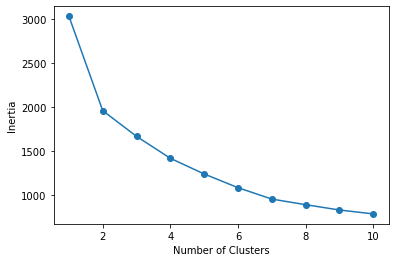

In [26]:
#Answer to 3

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%env OMP_NUM_THREADS=1

inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(df2)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

Based on this graph we can see after cluster number = 6, where the graph start becoming horizontal. This is the point which will be most optimal to choose.

            0         1         2
0   -0.420303 -1.300241  0.408774
1   -0.417860 -0.602073  0.189745
2   -0.417862 -0.602073  1.276353
3   -0.417271 -1.319309  1.010390
4   -0.413002 -1.319309  1.222307
..        ...       ...       ...
501 -0.306084  0.194366  0.984789
502 -0.393738  0.194366  0.984789
503 -0.369322  0.194366 -0.234088
504 -0.330528  0.223701 -0.093285
505 -0.344881  0.238368  0.671892

[506 rows x 3 columns]
[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 1 5 5 5 1 1 1 5 5 1 5 5 5 5 5 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 

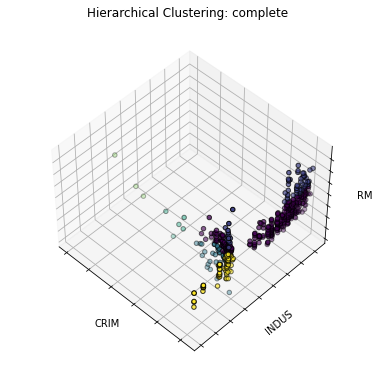

In [46]:
#Answer to 4

from sklearn.cluster import KMeans #Kmeans clustering
from sklearn.cluster import AgglomerativeClustering #Hierarichal clustering

# -- Hierarichal clustering: Agglomerative --
re_df = pd.DataFrame(df2, columns = [0, 1, 2]) #creating dataframe 
print(re_df)

#Creating a function for ploting
def plot3D(X, labels, linkage):
    fig = plt.figure(linkage, figsize=(6, 5))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=labels.astype(float), edgecolor="k") #column

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("CRIM")
    ax.set_ylabel("INDUS")
    ax.set_zlabel("RM")
    ax.set_title("Hierarchical Clustering: complete")
    ax.dist = 12

#let us do the clustering

linkage = "complete"
clustering = AgglomerativeClustering(linkage='complete', n_clusters=6)
    
clustering.fit(re_df)
print(clustering.labels_)
plot3D(re_df,clustering.labels_,linkage)

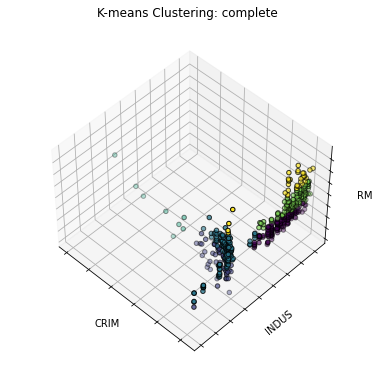

In [45]:
# -- Partitional Clustering: KMeans --

from sklearn.cluster import KMeans #Kmeans clustering
from sklearn.cluster import AgglomerativeClustering #Hierarichal clustering

re_df = pd.DataFrame(df2, columns = [0, 1, 2]) #creating dataframe

#Creating a function for ploting
def plot3D1(X, labels):
    fig1 = plt.figure(linkage, figsize=(6, 5))
    ax1 = fig1.add_subplot(111, projection="3d", elev=48, azim=134)
    ax1.set_position([0, 0, 0.95, 1])

    ax1.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=labels.astype(float), edgecolor="k") #column

    ax1.w_xaxis.set_ticklabels([])
    ax1.w_yaxis.set_ticklabels([])
    ax1.w_zaxis.set_ticklabels([])
    ax1.set_xlabel("CRIM")
    ax1.set_ylabel("INDUS")
    ax1.set_zlabel("RM")
    ax1.set_title("K-means Clustering: complete")
    ax1.dist = 12

#let us do the clustering

clustering = KMeans(n_clusters=6)
    
clustering.fit(re_df)
plot3D1(re_df,clustering.labels_)